<a href="https://colab.research.google.com/github/spahlavian/Intro-to-DL-with-fastai/blob/main/Intro_to_DL_02_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here are the libraries we need to run fastai. Let's install them using pip command:



In [44]:
#!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

Next, we create our DataLoaders:

In [33]:
#dest = '/content/DataML'
#dest = Path('/content/NewDataML')
#path = untar_data (URLs.PETS, dest=dest)/'images' 
def is_cat(x): return x[0].isupper() 

dls = ImageDataLoaders.from_name_func(
    path=path, fnames=get_image_files(path),
    valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)


NameError: name 'path' is not defined

Let's dig into the previous block line-by-line:

In [49]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [51]:
# Define the destination directory
dest = Path('/content/NewDataML1')

# Untar the dataset
data_dir = untar_data(URLs.PETS)

# Move the untarred data to the destination directory
shutil.move(data_dir, dest)

# Verify the path to the untarred data
print(dest)


\content\NewDataML1


In [52]:
# Define the destination directory for the dataset
dest = untar_data(URLs.PETS)


In [53]:
image_dir = data_dir / 'images'

In [62]:
list(image_dir.ls())

[Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-i

In [60]:
data_dir.ls()

(#2) [Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images')]

In [54]:
image_dir.ls()

(#7393) [Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat'),Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat'),Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat'),Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg')...]

In [55]:
list(image_dir.ls())

[Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg'),
 Path('C:/Users/ssari/.fastai/data/oxford-i

In [63]:
fnames = get_image_files(image_dir) # looks for all images recursively.
fnames[800].name

'beagle_1.jpg'

In [68]:
def is_cat(x): return x[0].isupper() 

dls = ImageDataLoaders.from_name_func(
    path=image_dir, fnames=get_image_files(image_dir),
    valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [69]:
is_cat("beagle_1.jpg")

False

Next, we create a learner object using the DataLoaders that we just created:


In [40]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

C:\Users\ssari\anaconda3\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\ssari\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ssari\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [41]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

Now, we can train our model. Here, we use *fine_tune()*, as we don't need to train the all parameters in our network:

In [42]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.170045,0.025755,0.008796,19:47


epoch,train_loss,valid_loss,error_rate,time
0,0.068372,0.012707,0.006089,25:14


We can check the performance of our model using our own images:

In [82]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [79]:
#img = PILImage.create(uploader.data[0])
#prediction,_,probs = learn.predict(img)
#print(f'Prediction: {prediction}')
#print(probs)

In [83]:
# Check if the uploader has any data
if uploader.data:
    img = PILImage.create(uploader.data[0])
    prediction, _, probs = learn.predict(img)
    print(f'Prediction: {prediction}')
    print(probs)
else:
    print("No file uploaded. Please upload an image.")


Prediction: False
tensor([9.9994e-01, 5.8278e-05])


... or using the *show_results()* method of our learner object:

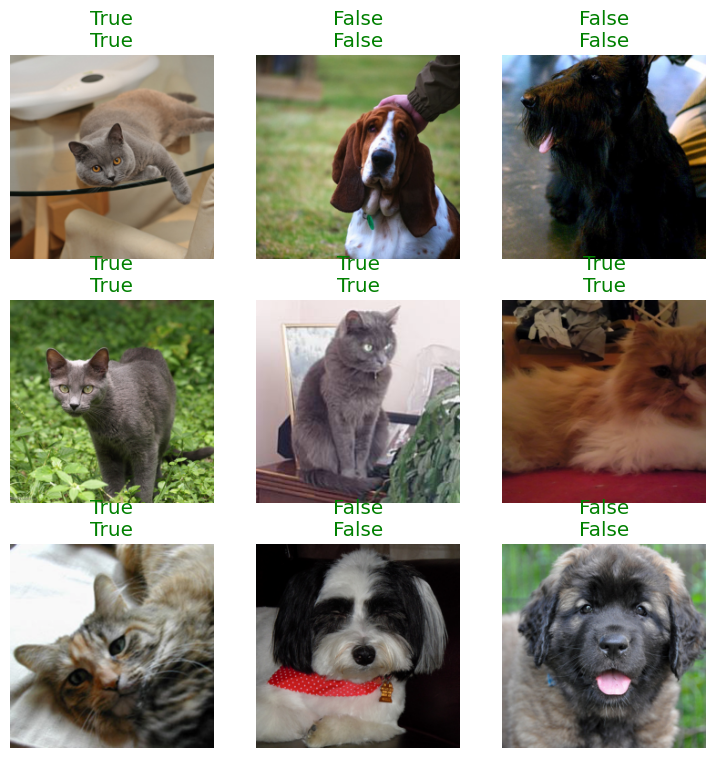

In [84]:
learn.show_results()

We can use the *doc()* function to view the documentation of various objects/function in fastai:

In [85]:
doc(ImageDataLoaders.from_name_func)

ImageDataLoaders.from_name_func(path: 'str | Path', fnames: 'list', label_func: 'callable', *, valid_pct=0.2, seed=None, item_tfms=None, batch_tfms=None, img_cls=<class 'fastai.vision.core.PILImage'>, bs: 'int' = 64, val_bs: 'int' = None, shuffle: 'bool' = True, device=None) -> 'DataLoaders'
Create from the name attrs of `fnames` in `path`s with `label_func`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev
